In [275]:
# !pip install arabic-reshaper python-bidi

In [276]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from ydata_profiling import ProfileReport
import arabic_reshaper
from bidi.algorithm import get_display
# from ipyvizzu import Chart, Data, Config

## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [278]:
data3=pd.read_csv('realEstate.csv')

In [279]:
df_regions = pd.read_csv('districts.csv')


### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [281]:
data3.head()

,user_id,id,title,price,content,imgs,refresh,beds,livings,wc,...,width,length,advertiser_type,create_time,review,profileImg,UserName,iam_verified,onMarket,IsRent
0,1495817,4596035,شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...,20000,1666 كل شهر,"['014958174_1659666836308.jpg', '014958178_165...","['2022-08-06', '12:22:15']",3,0.0,2,...,15.0,15.0,owner,"['2022-08-05', '02:44:23']",5.00,NaN,Thamer,True,17,False
1,496663,4599813,شقة للإيجار في شارع الاقتصاد ، حي الفيحاء ، ال...,25000,شقة ارضية للإيجار بحي الفيحاء شارع الاقتصاد \r...,"['004966630_1659781493595.jpg', '004966636_165...","['2022-08-06', '10:27:57']",3,1.0,2,...,NaN,NaN,exclusive_marketer,"['2022-08-06', '10:27:56']",4.33,yes,الاركان الثابته للعقارات,True,5,True
2,2412431,4554519,شقة للإيجار في شارع أبي الحسن الأسفرائيني ، حي...,22000,شقه للايجار حي الرمال \r\nمكون\r\nالدور ثالث\r...,"['023243548_1658701693777.jpg', '023243549_165...","['2022-08-06', '06:59:03']",3,1.0,2,...,10.0,20.0,normal_marketer,"['2022-07-24', '22:27:27']",4.67,NaN,مكتب منزلك الفاخر,True,15,True
3,1906500,4120004,شقة للإيجار في شارع أسيد بن ثعلبة ، حي العقيق ...,38000,شقه عوائل نظيفه جدا \r\nغرفه كبيره وصاله كبيره...,"['019065004_1659758037501.jpg', '019065000_165...","['2022-08-06', '03:52:58']",1,1.0,1,...,NaN,NaN,owner,"['2022-03-10', '09:17:01']",4.17,NaN,ابو مصطفى,True,165,False
4,1741562,4498954,شقة للإيجار في شارع العباس بن عبدالمطلب ، حي ا...,25000,غرفه وصاله وحمام راكب مطبخ\r\nراكب مكيفات مؤثث...,"['017415629_1657025837185.jpg', '017415620_165...","['2022-08-03', '10:53:47']",1,1.0,1,...,7.0,9.0,normal_marketer,"['2022-07-05', '13:03:54']",4.42,NaN,عقار المستقبل,True,48,False


In [282]:
df_regions

,district,region
0,حي النظيم,East
1,حي الفيحاء,East
2,حي الرمال,East
3,حي العقيق,North
4,حي التعاون,North
...,...,...
120,حي الجرادية,South
121,حي ثليم,South
122,حي ضاحية نمار,West
123,حي جرير,South


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [284]:
# profile = ProfileReport(data3, title="Profiling Report")
# profile

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [288]:
# Take the data from kaggle and the data source is: Aqar and it is reliable

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [290]:
# The data is not up-to-date "2022". but we can use it to answer our objective.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [292]:
# The data is Consistency with data source

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [294]:
# Sample Appropriatenes: The data is relevant to our objectives.

In [295]:
# Variable Selectio: There is multiple coulmns not relevant to our analysis. so, we decided to drop them.  

In [296]:
data3.columns

Index(['user_id', 'id', 'title', 'price', 'content', 'imgs', 'refresh', 'beds',
       'livings', 'wc', 'area', 'street_width', 'age', 'last_update',
       'ketchen', 'ac', 'furnished', 'location', 'path', 'district', 'width',
       'length', 'advertiser_type', 'create_time', 'review', 'profileImg',
       'UserName', 'iam_verified', 'onMarket', 'IsRent'],
      dtype='object')

In [297]:
df_aparts = data3

In [298]:
# profile = ProfileReport(df_aparts_cleaned, title="Profiling Report")
# profile

In [299]:
# dropping all the irrelevant columns
df_aparts = df_aparts.drop('content',axis=1)
df_aparts = df_aparts.drop('imgs',axis=1)
df_aparts = df_aparts.drop('path',axis=1)
df_aparts = df_aparts.drop('profileImg',axis=1)
df_aparts = df_aparts.drop('advertiser_type',axis=1)
df_aparts = df_aparts.drop('title',axis=1)

In [300]:
df_aparts = df_aparts.drop('width',axis=1)
df_aparts = df_aparts.drop('length',axis=1)

In [301]:
df_aparts = df_aparts.drop('refresh',axis=1)

In [302]:
df_aparts.head()

,user_id,id,price,beds,livings,wc,area,street_width,age,last_update,...,ac,furnished,location,district,create_time,review,UserName,iam_verified,onMarket,IsRent
0,1495817,4596035,20000,3,0.0,2,225.0,15.0,9.0,"['2022-08-06', '12:22:15']",...,0.0,0.0,"{'lat': 24.80093, 'lng': 46.89689, '__typename...",حي النظيم,"['2022-08-05', '02:44:23']",5.00,Thamer,True,17,False
1,496663,4599813,25000,3,1.0,2,130.0,30.0,12.0,"['2022-08-06', '10:27:56']",...,0.0,0.0,"{'lat': 24.687521, 'lng': 46.807558, '__typena...",حي الفيحاء,"['2022-08-06', '10:27:56']",4.33,الاركان الثابته للعقارات,True,5,True
2,2412431,4554519,22000,3,1.0,2,200.0,25.0,NaN,"['2022-08-06', '06:59:03']",...,0.0,0.0,"{'lat': 24.921463, 'lng': 46.80627, '__typenam...",حي الرمال,"['2022-07-24', '22:27:27']",4.67,مكتب منزلك الفاخر,True,15,True
3,1906500,4120004,38000,1,1.0,1,120.0,34.0,0.0,"['2022-08-06', '03:54:17']",...,1.0,0.0,"{'lat': 24.780059, 'lng': 46.630602, '__typena...",حي العقيق,"['2022-03-10', '09:17:01']",4.17,ابو مصطفى,True,165,False
4,1741562,4498954,25000,1,1.0,1,60.0,39.0,9.0,"['2022-08-03', '10:53:47']",...,1.0,0.0,"{'lat': 24.771793, 'lng': 46.698757, '__typena...",حي التعاون,"['2022-07-05', '13:03:54']",4.42,عقار المستقبل,True,48,False


In [303]:
import ast

df_aparts['location'] = df_aparts['location'].apply(lambda x: ast.literal_eval(x))
df_aparts['Latitude'] = df_aparts['location'].apply(lambda x: x.get('lat'))
df_aparts['Longitude'] = df_aparts['location'].apply(lambda x: x.get('lng'))
df_aparts = df_aparts.drop('location',axis=1)

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.

In [305]:
df_aparts.duplicated().sum()

0

In [306]:
# There is no duplicates rows 

#### 6. Completeness:

Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [308]:
#Display number missing values per column
df_aparts.isnull().sum().sort_values(ascending = False)

age             705
review          399
street_width    210
area            175
iam_verified    146
UserName         93
furnished        45
ac               19
ketchen          17
livings           2
create_time       0
Latitude          0
IsRent            0
onMarket          0
user_id           0
district          0
id                0
last_update       0
wc                0
beds              0
price             0
Longitude         0
dtype: int64

In [309]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [311]:
df_aparts.dtypes

user_id           int64
id                int64
price             int64
beds              int64
livings         float64
wc                int64
area            float64
street_width    float64
age             float64
last_update      object
ketchen         float64
ac              float64
furnished       float64
district         object
create_time      object
review          float64
UserName         object
iam_verified     object
onMarket          int64
IsRent             bool
Latitude        float64
Longitude       float64
dtype: object

In [312]:
df_aparts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       6762 non-null   int64  
 1   id            6762 non-null   int64  
 2   price         6762 non-null   int64  
 3   beds          6762 non-null   int64  
 4   livings       6760 non-null   float64
 5   wc            6762 non-null   int64  
 6   area          6587 non-null   float64
 7   street_width  6552 non-null   float64
 8   age           6057 non-null   float64
 9   last_update   6762 non-null   object 
 10  ketchen       6745 non-null   float64
 11  ac            6743 non-null   float64
 12  furnished     6717 non-null   float64
 13  district      6762 non-null   object 
 14  create_time   6762 non-null   object 
 15  review        6363 non-null   float64
 16  UserName      6669 non-null   object 
 17  iam_verified  6616 non-null   object 
 18  onMarket      6762 non-null 

In [313]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [315]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [316]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [317]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [321]:
# Completeness

In [322]:
df_aparts['area'] = df_aparts['area'].fillna(0)
df_aparts['street_width'] = df_aparts['street_width'].fillna(0)
df_aparts['furnished'] = df_aparts['furnished'].fillna(0)
df_aparts['review'] = df_aparts['review'].fillna(0)
df_aparts['UserName'] = df_aparts['UserName'].fillna('unknown')
df_aparts['iam_verified'] = df_aparts['iam_verified'].fillna(False)
df_aparts['livings'] = df_aparts['livings'].fillna(0)
df_aparts['ketchen'] = df_aparts['ketchen'].fillna(1)
df_aparts['ac'] = df_aparts['ac'].fillna(1)

/var/folders/qz/lxxmvdzn2clgz36pz9bdn1800000gn/T/ipykernel_31673/1710422018.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_aparts['iam_verified'] = df_aparts['iam_verified'].fillna(False)


In [323]:
median_age = df_aparts['age'].median()
df_aparts['age'] = df_aparts['age'].fillna(median_age)

In [324]:
df_aparts.isnull().sum()

user_id         0
id              0
price           0
beds            0
livings         0
wc              0
area            0
street_width    0
age             0
last_update     0
ketchen         0
ac              0
furnished       0
district        0
create_time     0
review          0
UserName        0
iam_verified    0
onMarket        0
IsRent          0
Latitude        0
Longitude       0
dtype: int64

### Correcting errors

-------------------

In [326]:
df_aparts.columns

Index(['user_id', 'id', 'price', 'beds', 'livings', 'wc', 'area',
       'street_width', 'age', 'last_update', 'ketchen', 'ac', 'furnished',
       'district', 'create_time', 'review', 'UserName', 'iam_verified',
       'onMarket', 'IsRent', 'Latitude', 'Longitude'],
      dtype='object')

In [327]:
df_aparts.rename(columns={
    'beds': 'bedrooms',
    'wc': 'bathroom',
    'ac': 'air_conditioning',
    'UserName': 'seller',
    'iam_verified': 'verified',
    'onMarket': 'days_on_market',
    'IsRent': 'available_for_rent',
    'Latitude': 'latitude',
    'Longitude': 'longitude',
    'livings': 'living_rooms',
    'ketchen': 'kitchen'
    }, inplace=True)

In [328]:
df_aparts.head(2)

,user_id,id,price,bedrooms,living_rooms,bathroom,area,street_width,age,last_update,...,furnished,district,create_time,review,seller,verified,days_on_market,available_for_rent,latitude,longitude
0,1495817,4596035,20000,3,0.0,2,225.0,15.0,9.0,"['2022-08-06', '12:22:15']",...,0.0,حي النظيم,"['2022-08-05', '02:44:23']",5.00,Thamer,True,17,False,24.800930,46.896890
1,496663,4599813,25000,3,1.0,2,130.0,30.0,12.0,"['2022-08-06', '10:27:56']",...,0.0,حي الفيحاء,"['2022-08-06', '10:27:56']",4.33,الاركان الثابته للعقارات,True,5,True,24.687521,46.807558


In [329]:
df_regions_dict = df_regions.set_index('district')['region'].to_dict()
df_regions_dict

{'حي النظيم': 'East',
 'حي الفيحاء': 'East',
 'حي الرمال': 'East',
 'حي العقيق': 'North',
 'حي التعاون': 'North',
 'حي الياسمين': 'North',
 'حي المونسية': 'East',
 'حي النرجس': 'North',
 'حي اشبيلية': 'East',
 'حي الندى': 'North',
 'حي البديعة': 'West',
 'حي الحمراء': 'East',
 'حي القيروان': 'North',
 'حي الفاخرية': 'Center',
 'حي الوزارات': 'Center',
 'حي الخليج': 'East',
 'حي الازدهار': 'East',
 'حي العارض': 'North',
 'حي الملقا': 'North',
 'حي عكاظ': 'South',
 'حي عرقة': 'West',
 'حي ظهرة لبن': 'West',
 'حي حطين': 'North',
 'حي الشهداء': 'East',
 'حي القادسية': 'East',
 'حي قرطبة': 'East',
 'حي المروج': 'Center',
 'حي الربيع': 'North',
 'حي اليرموك': 'East',
 'حي طويق': 'West',
 'حي النهضة': 'East',
 'حي الصحافة': 'North',
 'حي الريان': 'East',
 'حي الاندلس': 'East',
 'حي السليمانية': 'North',
 'حي النفل': 'North',
 'حي الخزامى': 'North',
 'حي الوادي': 'North',
 'حي عتيقة': 'South',
 'حي السويدي': 'West',
 'حي ظهرة نمار': 'West',
 'حي الشرق': 'East',
 'حي الديرة': 'South',
 'حي اليم

In [330]:
def locfun(district_name):
    for key in df_regions_dict:
        if key == district_name:
            return df_regions_dict.get(key)


df_aparts['region'] = df_aparts['district'].apply(locfun)

In [331]:
# go back to 7th dimension Accuracy 

In [332]:
def string_to_datetime(string_value):
    list_value = ast.literal_eval(string_value)
    date_part = list_value[0]
    time_part = list_value[1]
    return pd.to_datetime(f"{date_part} {time_part}")

df_aparts['last_update'] = df_aparts['last_update'].apply(string_to_datetime)
df_aparts['create_time'] = df_aparts['create_time'].apply(string_to_datetime)

df_aparts['living_rooms'] = df_aparts['living_rooms'].astype(int)
df_aparts['kitchen'] = df_aparts['kitchen'].astype(bool)
df_aparts['air_conditioning'] = df_aparts['air_conditioning'].astype(bool)
df_aparts['furnished'] = df_aparts['furnished'].astype(bool)

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


In [335]:
df_aparts_cleaned = df_aparts[(df_aparts['area'] >= 25) & (df_aparts['area'] <= 500)]
df_aparts_cleaned = df_aparts_cleaned[(df_aparts_cleaned['price'] > 250) & (df_aparts_cleaned['price'] <= 150000)]
df_aparts_cleaned = df_aparts_cleaned[(df_aparts_cleaned['street_width'] >= 5) & (df_aparts_cleaned['street_width'] <= 60)]

In [336]:
df_aparts_cleaned.head()

,user_id,id,price,bedrooms,living_rooms,bathroom,area,street_width,age,last_update,...,district,create_time,review,seller,verified,days_on_market,available_for_rent,latitude,longitude,region
0,1495817,4596035,20000,3,0,2,225.0,15.0,9.0,2022-08-06 12:22:15,...,حي النظيم,2022-08-05 02:44:23,5.00,Thamer,True,17,False,24.800930,46.896890,East
1,496663,4599813,25000,3,1,2,130.0,30.0,12.0,2022-08-06 10:27:56,...,حي الفيحاء,2022-08-06 10:27:56,4.33,الاركان الثابته للعقارات,True,5,True,24.687521,46.807558,East
2,2412431,4554519,22000,3,1,2,200.0,25.0,1.0,2022-08-06 06:59:03,...,حي الرمال,2022-07-24 22:27:27,4.67,مكتب منزلك الفاخر,True,15,True,24.921463,46.806270,East
3,1906500,4120004,38000,1,1,1,120.0,34.0,0.0,2022-08-06 03:54:17,...,حي العقيق,2022-03-10 09:17:01,4.17,ابو مصطفى,True,165,False,24.780059,46.630602,North
4,1741562,4498954,25000,1,1,1,60.0,39.0,9.0,2022-08-03 10:53:47,...,حي التعاون,2022-07-05 13:03:54,4.42,عقار المستقبل,True,48,False,24.771793,46.698757,North


In [337]:
df_aparts_cleaned.columns

Index(['user_id', 'id', 'price', 'bedrooms', 'living_rooms', 'bathroom',
       'area', 'street_width', 'age', 'last_update', 'kitchen',
       'air_conditioning', 'furnished', 'district', 'create_time', 'review',
       'seller', 'verified', 'days_on_market', 'available_for_rent',
       'latitude', 'longitude', 'region'],
      dtype='object')

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

### 1. Offers per region:

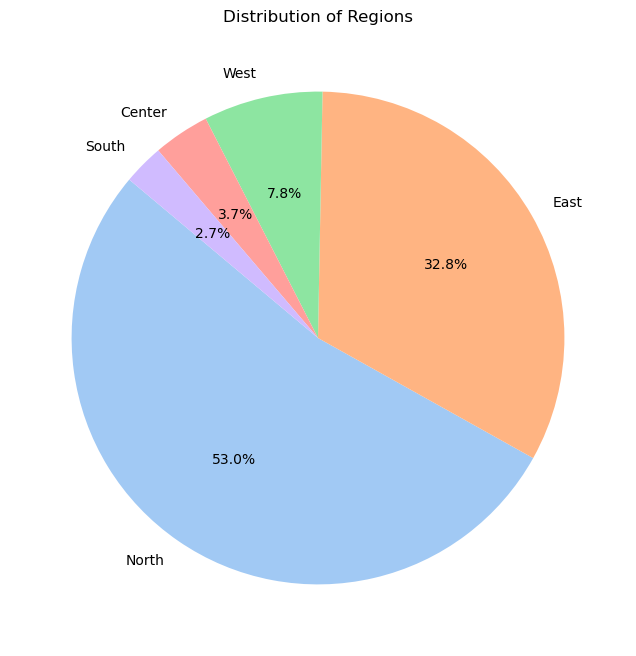

In [342]:
unique_regions_count = df_aparts_cleaned['region'].nunique()
region_counts = df_aparts_cleaned['region'].value_counts()

plt.figure(figsize=(10, 8))
region_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Regions')
plt.ylabel('')
plt.show()

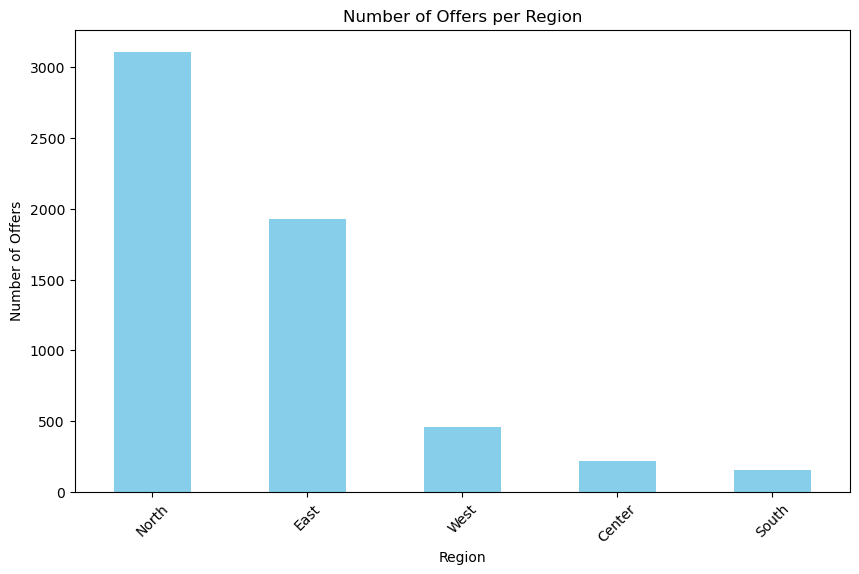

In [343]:
offers_per_region = df_aparts_cleaned['region'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
offers_per_region.plot(kind='bar', color='skyblue')
plt.title('Number of Offers per Region')
plt.xlabel('Region')
plt.ylabel('Number of Offers')
plt.xticks(rotation=45)
plt.show()

### 2. Price per region: 

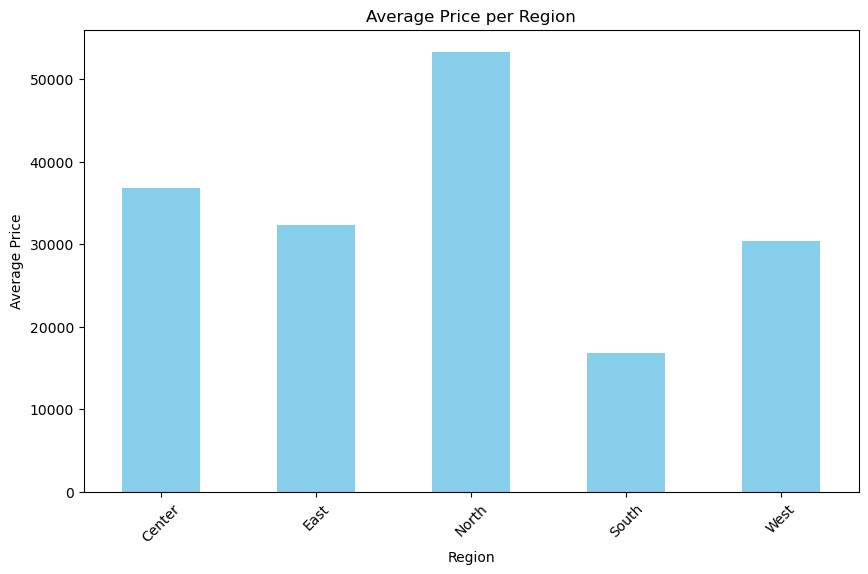

In [345]:
price_per_region = df_aparts_cleaned.groupby('region')['price'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
price_per_region.plot(kind='bar', color='skyblue')
plt.title('Average Price per Region')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

### 3. prices per neighborhood

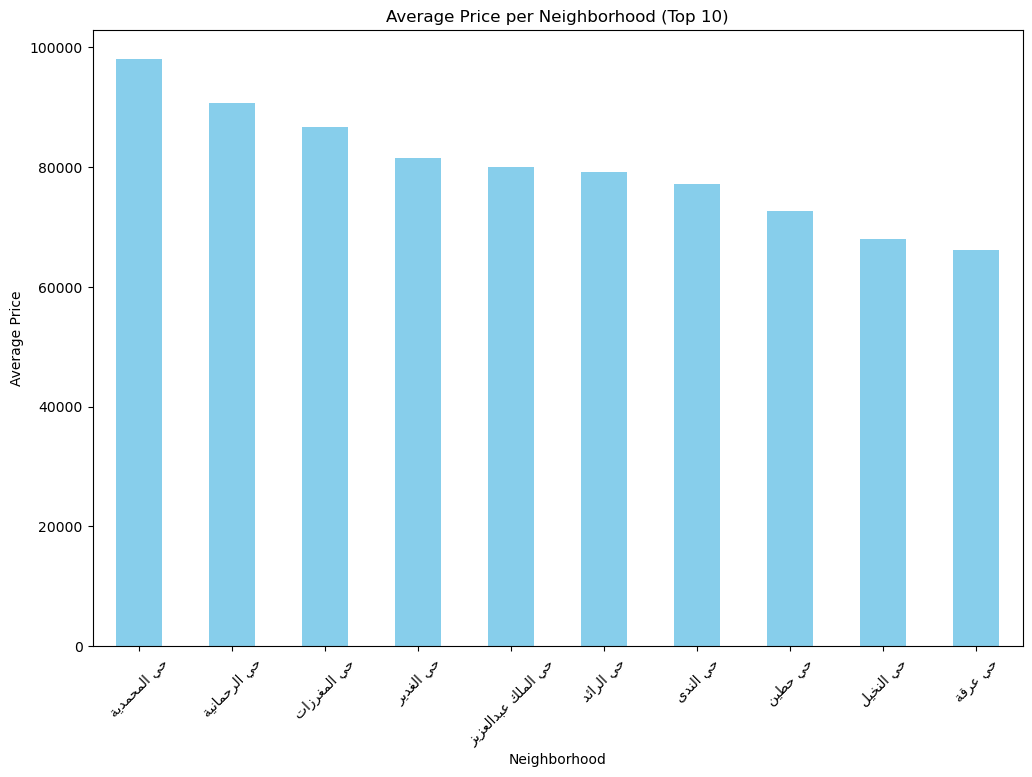

In [347]:
price_per_neighborhood = df_aparts_cleaned.groupby('district')['price'].mean()
top_10_neighborhoods = price_per_neighborhood.nlargest(10)

# Reshape Arabic text and apply bidirectional algorithm
top_10_neighborhoods.index = [get_display(arabic_reshaper.reshape(neigh)) for neigh in top_10_neighborhoods.index]

# Create a bar chart
plt.figure(figsize=(12, 8))
top_10_neighborhoods.plot(kind='bar', color='skyblue')
plt.title(get_display(arabic_reshaper.reshape('Average Price per Neighborhood (Top 10)')))
plt.xlabel(get_display(arabic_reshaper.reshape('Neighborhood')))
plt.ylabel(get_display(arabic_reshaper.reshape('Average Price')))
plt.xticks(rotation=45)
plt.show()

### 4. ( Price and Neighborhood ) for each region

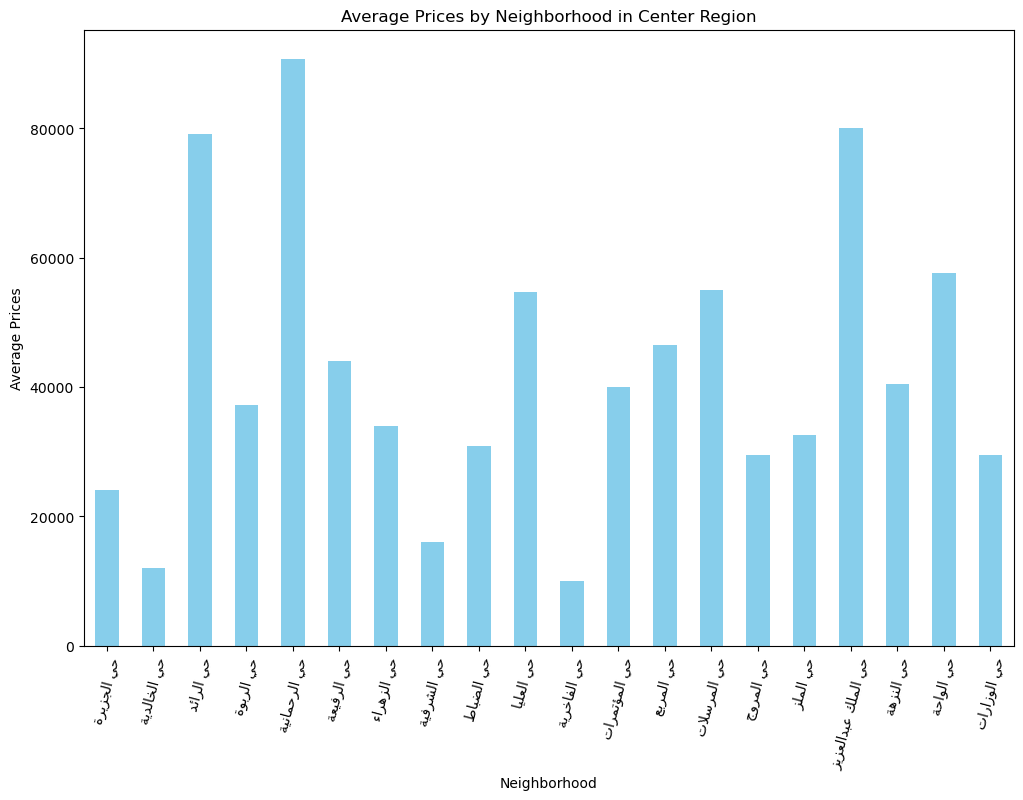

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


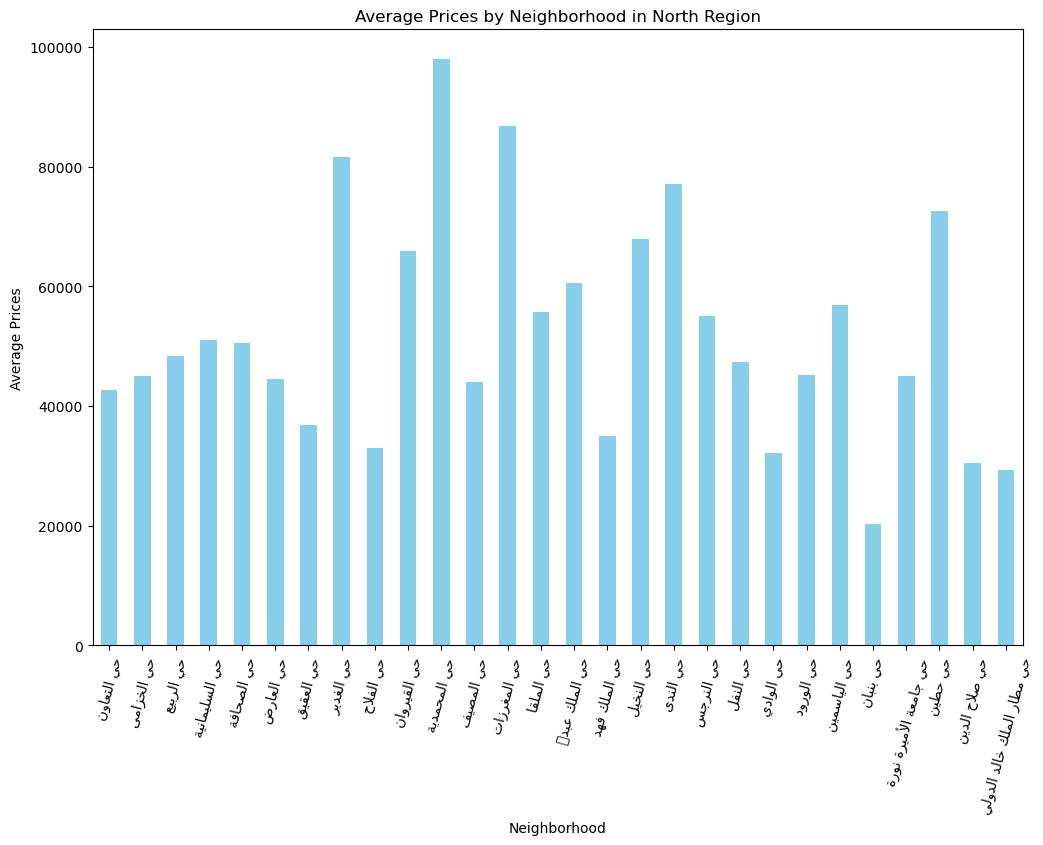

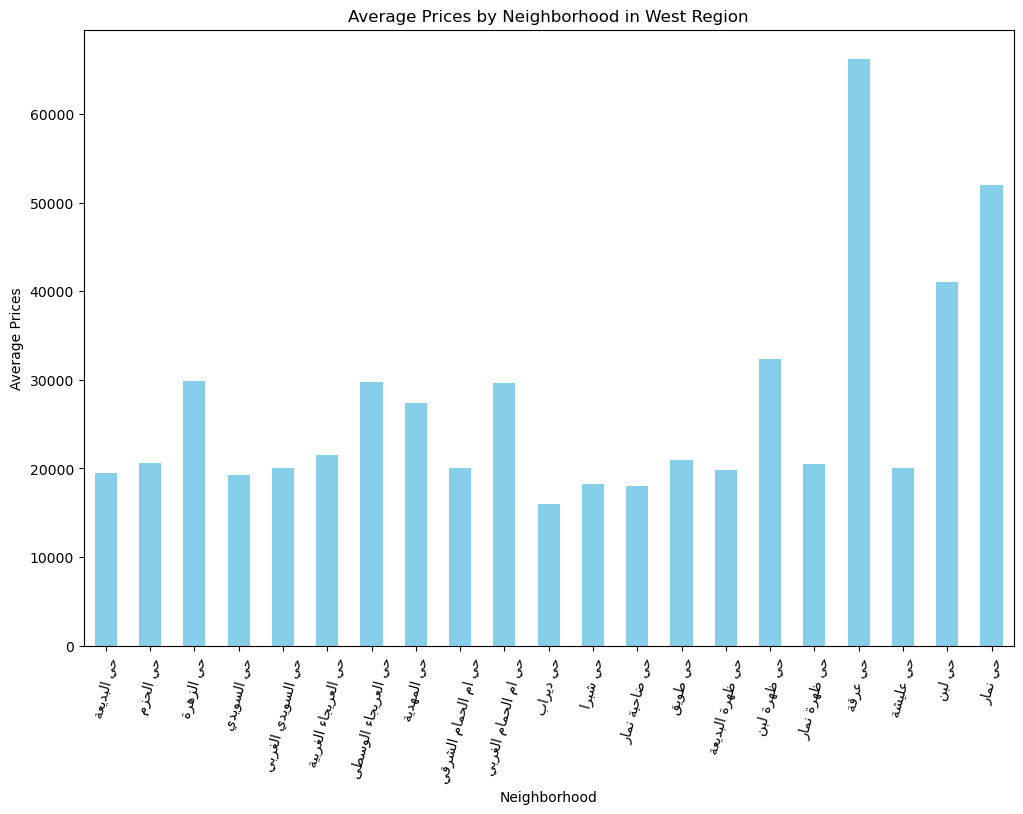

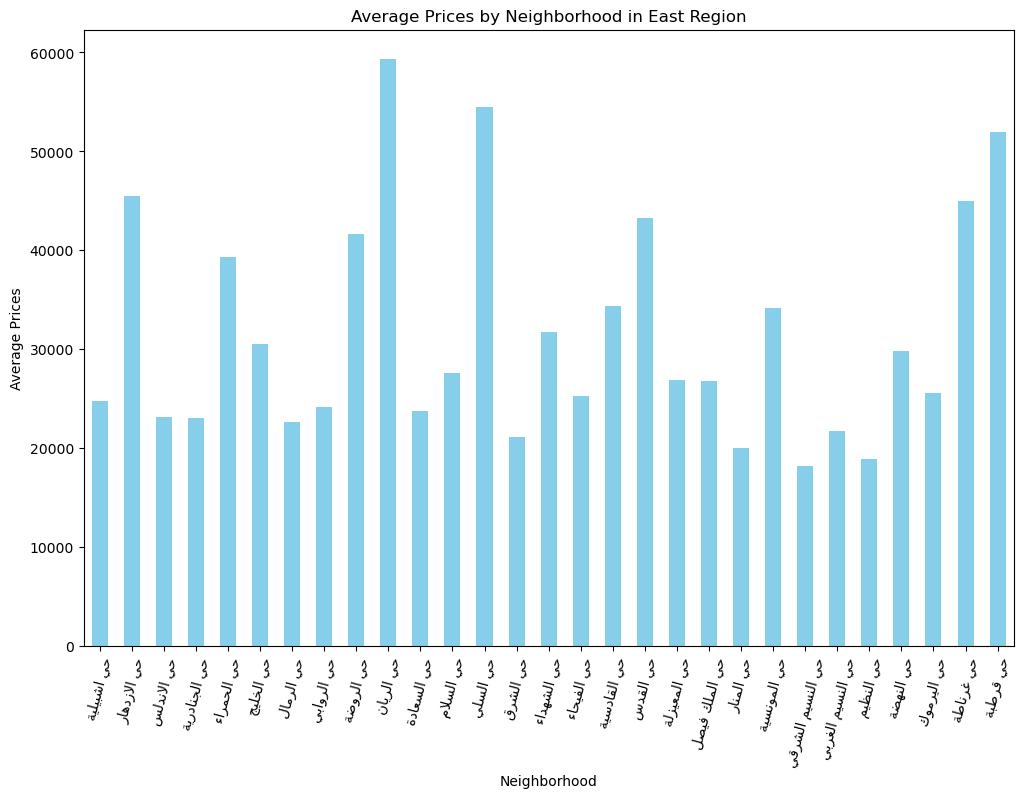

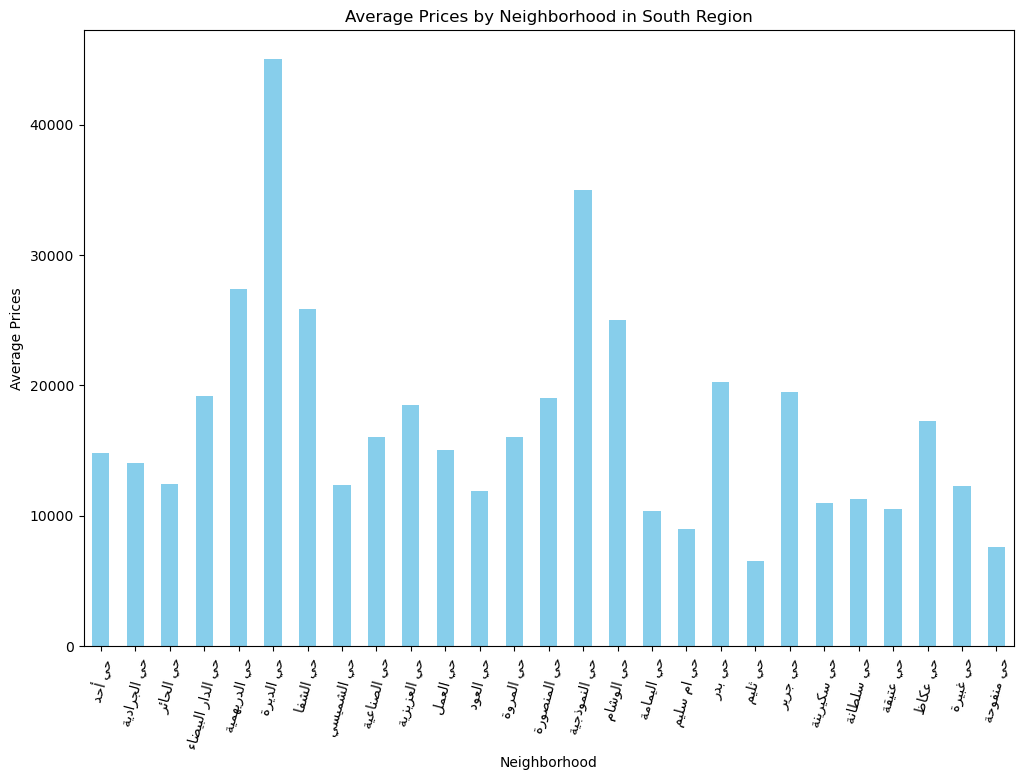

In [412]:
def plot_region_neighborhood_prices(df_aparts_cleaned, region_name):
    region_data = df_aparts_cleaned[df_aparts_cleaned['region'] == region_name]
    price_per_neighborhood = region_data.groupby('district')['price'].mean()
    price_per_neighborhood.index = [get_display(arabic_reshaper.reshape(neigh)) for neigh in price_per_neighborhood.index]
    
    plt.figure(figsize=(12, 8))
    price_per_neighborhood.plot(kind='bar', color='skyblue')
    
    plt.title(get_display(arabic_reshaper.reshape(f'Average Prices by Neighborhood in {region_name} Region')))
    plt.xlabel(get_display(arabic_reshaper.reshape('Neighborhood')))
    plt.ylabel(get_display(arabic_reshaper.reshape('Average Prices')))
    plt.xticks(rotation=75)
    plt.show()

regions = ['Center', 'North', 'West', 'East', 'South']

for region in regions:
    plot_region_neighborhood_prices(df_aparts_cleaned, region)

### 5. Relationship Between Size and Price Across Different Regions:

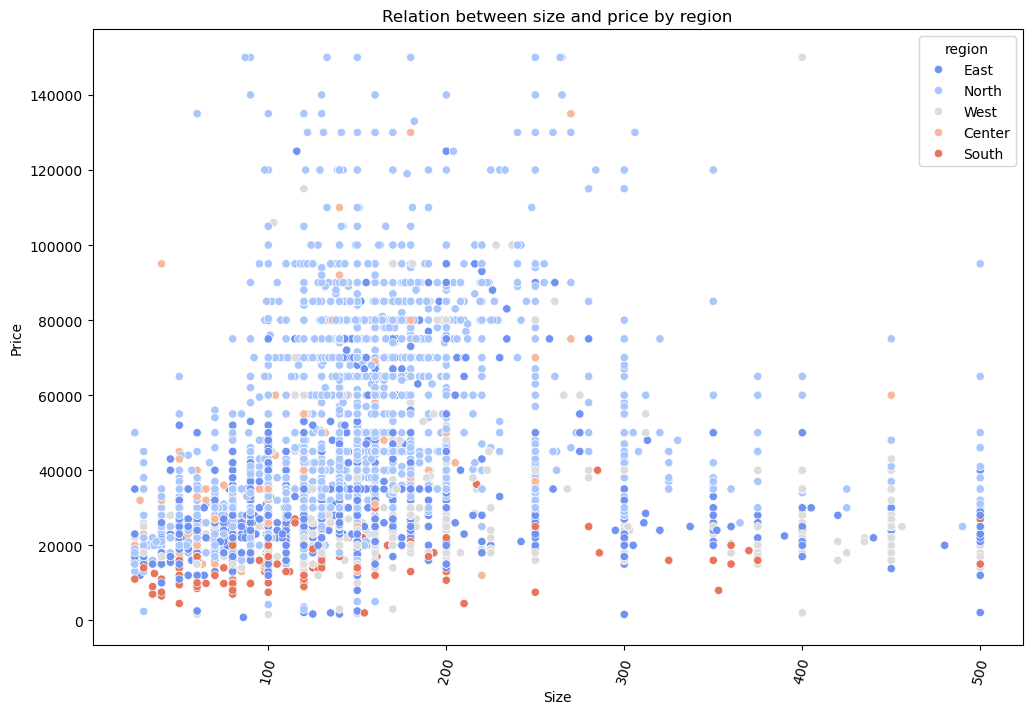

In [428]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='area', y='price', hue='region', data=df_aparts_cleaned, palette='coolwarm')
plt.title(get_display(arabic_reshaper.reshape('Relation between size and price by region')))
plt.xlabel(get_display(arabic_reshaper.reshape('Size')))
plt.ylabel(get_display(arabic_reshaper.reshape('Price')))
plt.xticks(rotation=75)
plt.show()

### 6. Common Property Sizes (Area) in Each Region:

/var/folders/qz/lxxmvdzn2clgz36pz9bdn1800000gn/T/ipykernel_31673/962079132.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='area', data=df_aparts_cleaned, palette='coolwarm')


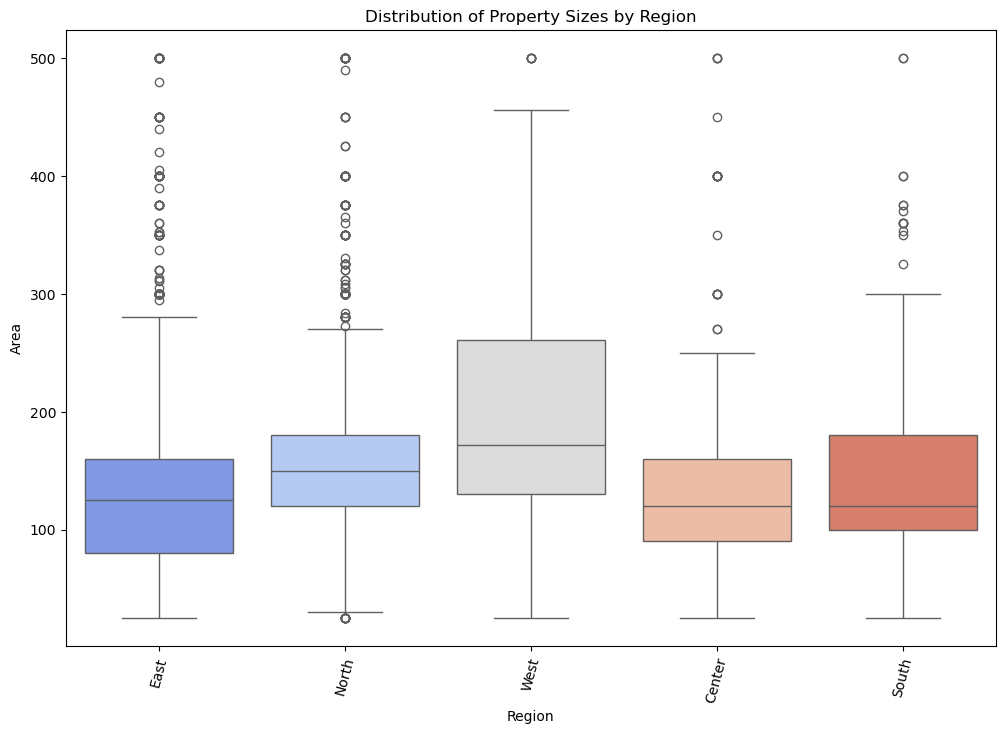

In [416]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='region', y='area', data=df_aparts_cleaned, palette='coolwarm')
plt.title(get_display(arabic_reshaper.reshape('Distribution of Property Sizes by Region')))
plt.xlabel(get_display(arabic_reshaper.reshape('Region')))
plt.ylabel(get_display(arabic_reshaper.reshape('Area')))
plt.xticks(rotation=75)
plt.show()

### 7. Impact of Amenities on Price:

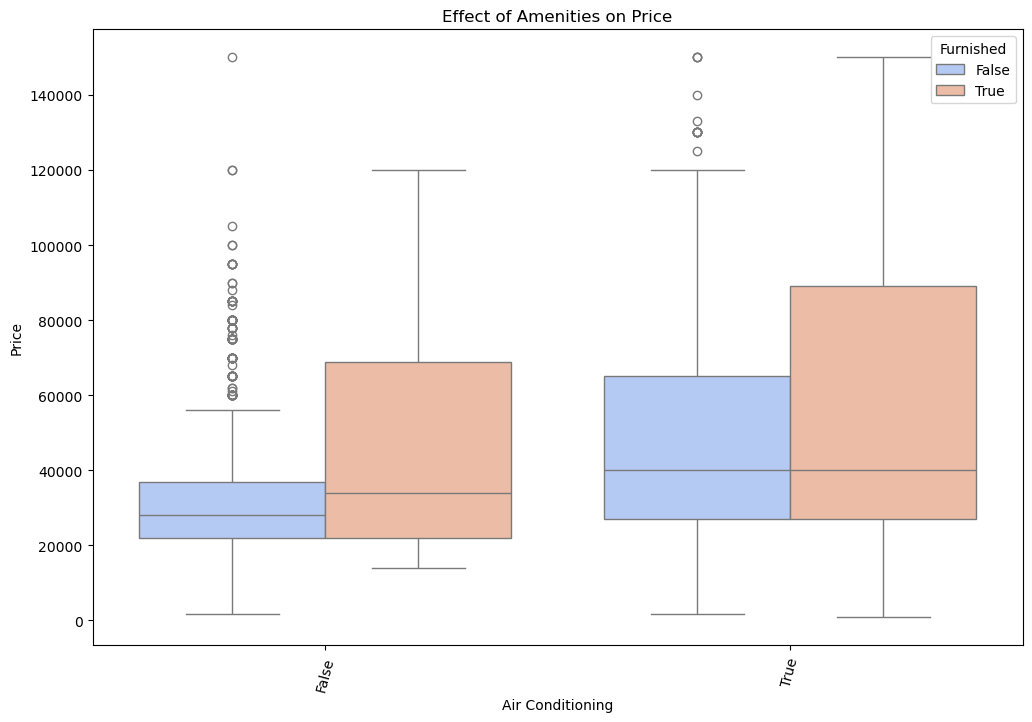

In [426]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='air_conditioning', y='price', hue='furnished', data=df_aparts_cleaned, palette='coolwarm')
plt.title('Effect of Amenities on Price')
plt.xlabel('Air Conditioning')
plt.ylabel('Price')
plt.xticks(rotation=75)
plt.legend(title='Furnished')
plt.show()

### 8. Averge Price pr Neighborhoos Last 10 

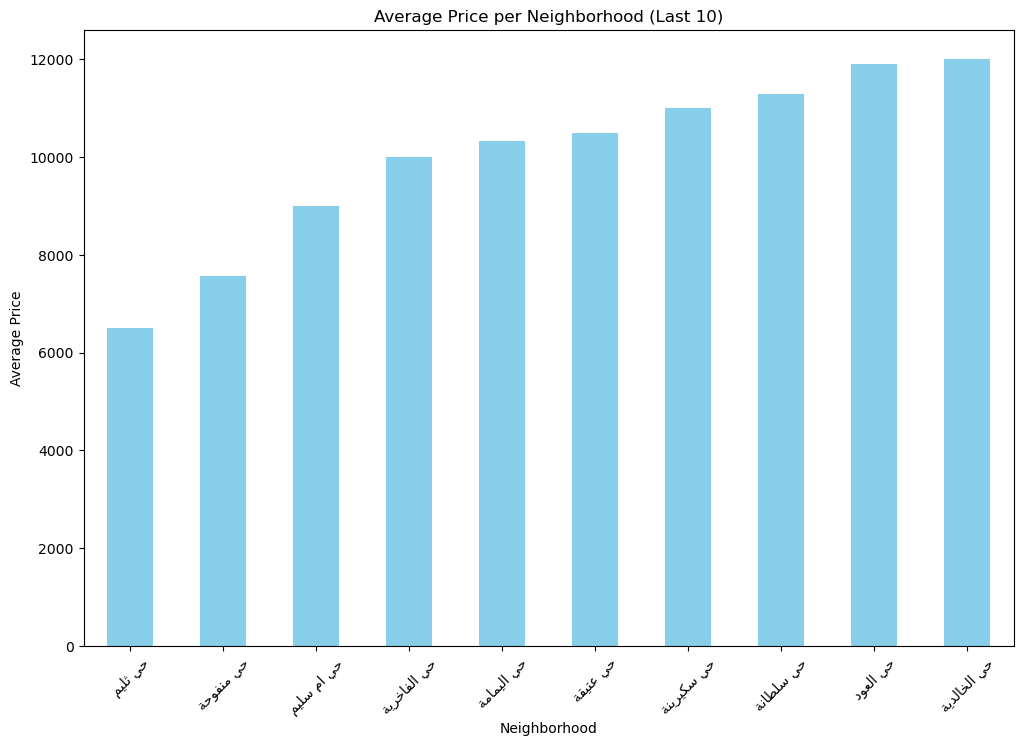

In [431]:
price_per_neighborhood = df_aparts_cleaned.groupby('district')['price'].mean()
last_10_neighborhoods = price_per_neighborhood.nsmallest(10)

# Reshape Arabic text and apply bidirectional algorithm
last_10_neighborhoods.index = [get_display(arabic_reshaper.reshape(neigh)) for neigh in last_10_neighborhoods.index]

# Create a bar chart
plt.figure(figsize=(12, 8))
last_10_neighborhoods.plot(kind='bar', color='skyblue')
plt.title(get_display(arabic_reshaper.reshape('Average Price per Neighborhood (Last 10)')))
plt.xlabel(get_display(arabic_reshaper.reshape('Neighborhood')))
plt.ylabel(get_display(arabic_reshaper.reshape('Average Price')))
plt.xticks(rotation=45)
plt.show()